In [ ]:
# Importar bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

                                                texto categoria
0   Discussão sobre ministro e lei no setor de Pol...  Política
1         Política em destaque: lei ministro eleição.  Política
2   Discussão sobre democracia e parlamento no set...  Política
3   Política: especialistas comentam sobre governo...  Política
4   Discussão sobre parlamento e democracia no set...  Política
5   Política em destaque: eleição campanha democra...  Política
6   Política em destaque: parlamento votação campa...  Política
7   Política: especialistas comentam sobre parlame...  Política
8   Análise recente aponta tendências em Política ...  Política
9   Análise recente aponta tendências em Política ...  Política
10    Política em destaque: eleição votação campanha.  Política
11  Análise recente aponta tendências em Política ...  Política
12  Política: especialistas comentam sobre lei ele...  Política
13  Discussão sobre votação e presidente no setor ...  Política
14  Últimas notícias sobre Política: par

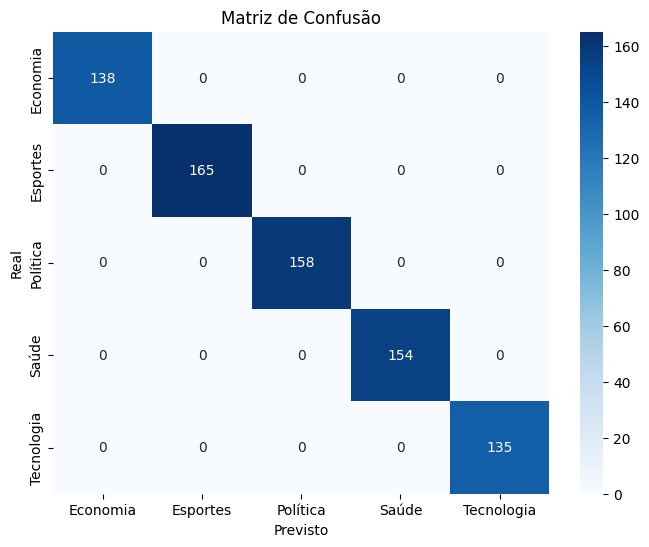


Notícia: Novo avanço tecnológico em inteligência artificial impressiona especialistas
Categoria prevista: Tecnologia


In [ ]:
# 1. Carregar o dataset
df = pd.read_csv("/content/news_dataset_balanceado.csv")

print(df.head(20))

df = df[['texto', 'categoria']]

# 2. Separar features e labels
X = df['texto']
y = df['categoria']

# 3. Codificar categorias
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# 4. Divisão de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# lista de stop words
portuguese_stop_words = [
    'de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'das', 'ao', 'à', 'dele', 'dela', 'deles', 'delas', 'àquele', 'àquela', 'àqueles', 'àquelas', 'este', 'esta', 'isto', 'aquele', 'aquela', 'aquilo', 'ele', 'ela', 'eles', 'elas', 'dele', 'dela', 'deles', 'delas', 'este', 'esta', 'isto', 'aquele', 'aquela', 'aquilo', 'quem', 'qual', 'quais', 'quanto', 'quantos', 'quantas', 'onde', 'como', 'porquê', 'qual', 'quais', 'quanto', 'quantos', 'quantas', 'onde', 'como', 'porquê', 'que', 'quem', 'qual', 'quais', 'onde', 'como', 'porquê', 'quando', 'então', 'se', 'assim', 'mas', 'ou', 'senão', 'apenas', 'além', 'faz', 'fazer', 'feito', 'feita', 'fazer', 'feitos', 'feitas', 'fazendo', 'fará', 'farão', 'farei', 'faremos', 'faria', 'fariam', 'fizesse', 'fizessem', 'fizeste', 'fizemos', 'fizeram', 'fez', 'faço', 'fazes', 'fazemos', 'fazem', 'ter', 'tinha', 'tinham', 'tive', 'tiveste', 'tivemos', 'tiveram', 'tivera', 'tiveram', 'tivesse', 'tivessem', 'tiver', 'tiverem', 'terei', 'terá', 'teremos', 'terão', 'teria', 'teriam', 'ser', 'sou', 'é', 'somos', 'são', 'era', 'eras', 'era', 'éramos', 'eram', 'fui', 'foste', 'foi', 'fomos', 'foram', 'fora', 'foram', 'fosse', 'fossem', 'for', 'forem', 'serei', 'será', 'seremos', 'serão', 'seria', 'seriam', 'ir', 'vou', 'vai', 'vamos', 'vão', 'ia', 'ias', 'ia', 'íamos', 'iam', 'fui', 'foste', 'foi', 'fomos', 'foram', 'fora', 'foram', 'fosse', 'fossem', 'for', 'forem', 'irei', 'irá', 'iremos', 'irão', 'iria', 'iriam', 'estar', 'estou', 'está', 'estamos', 'estão', 'estava', 'estavas', 'estava', 'estávamos', 'estavam', 'estive', 'estiveste', 'esteve', 'estivemos', 'estiveram', 'estivera', 'estiveram', 'estivesse', 'estivessem', 'estiver', 'estiverem', 'estarei', 'estará', 'estaremos', 'estarão', 'estaria', 'estariam', 'haver', 'há', 'havemos', 'hão', 'havia', 'haviam', 'houve', 'houveste', 'houve', 'houvemos', 'houveram', 'houvera', 'houveram', 'houvesse', 'houvessem', 'houver', 'houverem', 'haverei', 'haverá', 'haveremos', 'haverão', 'haveria', 'haveriam', 'dizer', 'digo', 'diz', 'dizemos', 'dizem', 'dizia', 'dizias', 'dizia', 'dizíamos', 'diziam', 'disse', 'disseste', 'disse', 'dissemos', 'disseram', 'dissera', 'disseram', 'dissesse', 'dissessem', 'disser', 'disserem', 'direi', 'dirá', 'diremos', 'dirão', 'diria', 'diriam', 'poder', 'posso', 'pode', 'podemos', 'podem', 'podia', 'podias', 'podia', 'podíamos', 'podiam', 'pude', 'pudeste', 'pôde', 'pudemos', 'puderam', 'pudera', 'puderam', 'pudesse', 'pudessem', 'puder', 'puderem', 'poderei', 'poderá', 'poderemos', 'poderão', 'poderia', 'poderiam', 'ver', 'vejo', 'vê', 'vemos', 'vêem', 'via', 'vias', 'via', 'víamos', 'viam', 'vi', 'viste', 'viu', 'vimos', 'viram', 'vira', 'viram', 'visse', 'vissem', 'vir', 'virem', 'verei', 'verá', 'veremos', 'verão', 'veria', 'veriam', 'dar', 'dou', 'dá', 'damos', 'dão', 'dava', 'davas', 'dava', 'dávamos', 'davam', 'dei', 'deste', 'deu', 'demos', 'deram', 'dera', 'deram', 'desse', 'dessem', 'der', 'derem', 'darei', 'dará', 'daremos', 'darão', 'daria', 'dariam', 'saber', 'sei', 'sabe', 'sabemos', 'sabem', 'sabia', 'sabias', 'sabia', 'sabíamos', 'sabiam', 'soube', 'soubeste', 'soube', 'soubemos', 'souberam', 'soubera', 'souberam', 'soubesse', 'soubessem', 'souber', 'souberem', 'saberei', 'saberá', 'saberemos', 'saberão', 'saberia', 'saberiam', 'fazer', 'fiz', 'fez', 'fazemos', 'fazem', 'fazia', 'fazias', 'fazia', 'fazíamos', 'faziam', 'fiz', 'fizeste', 'fez', 'fizemos', 'fizeram', 'fizera', 'fizeram', 'fizesse', 'fizessem', 'fizer', 'fizerem', 'farei', 'fará', 'faremos', 'farão', 'faria', 'fariam'
]

# 5. Vetorização TF-IDF
vectorizer = TfidfVectorizer(stop_words=portuguese_stop_words, max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 6. Modelo de Classificação
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# 7. Previsões
y_pred = model.predict(X_test_tfidf)

# Obtenha nomes de classes exclusivos do codificador
unique_class_names = list(set(encoder.classes_))

# Obtenha rótulos exclusivos de y_test e seus nomes de classe correspondentes
unique_test_labels = np.unique(y_test)
test_class_names = encoder.inverse_transform(unique_test_labels)


# 8. Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=unique_class_names))

# 9. Matriz de confusão
cm = confusion_matrix(y_test, y_pred, labels=unique_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_class_names, yticklabels=test_class_names)
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# 10. Teste interativo
def prever_categoria(noticia):
    noticia_tfidf = vectorizer.transform([noticia])
    categoria_prevista = model.predict(noticia_tfidf)[0]
    return encoder.inverse_transform([categoria_prevista])[0]

# Exemplo de teste
exemplo = "Novo avanço tecnológico em inteligência artificial impressiona especialistas"
print(f"\nNotícia: {exemplo}")
print(f"Categoria prevista: {prever_categoria(exemplo)}")